<h1 style="font-family: Arial; font-weight: 900; color: magenta; text-align: center;">CLASSIFICATION AND LINEAR REGRESSION -<br>THE BASICS</h1><br>

<br/><div style="font-family: Arial; color: darkblue; font-size: 14px; font-weight: 600"><a id="toc"></a>
In this part 2:
    <p style="margin: 0 0 0 2rem; font-size: 16px; font-weight: 800">[1. The perceptron](#1)</p>
        <p style="margin: 0 0 0 4rem">[1a. Presentation](#1a)</p>
        <p style="margin: 0 0 0 4rem">[1b. The perceptron algorithm](#1b)</p>
        <p style="margin: 0 0 0 4rem">[1c. Convergence of the algorithm](#1c)</p>
        <p style="margin: 0 0 0 4rem">[1d. A code for the perceptron](#1d)</p>
        <p style="margin: 0 0 0 4rem">[1e. Example with the iris dataset](#1e)</p><br>
    <p style="margin: 0 0 0 2rem; font-size: 16px; font-weight: 800">[2. Linear and polynomial regression](#2)</p>
        <p style="margin: 0 0 0 4rem">[2a. Linear regression](#2a)</p>
        <p style="margin: 0 0 0 4rem">[2b. The normal equation](#2b)</p>
        <p style="margin: 0 0 0 4rem">[2c. The batch gradient descent (BGD)](#2c)</p>
        <p style="margin: 0 0 0 4rem">[2d. The stochastic gradient descent (SGD)](#2d)</p>
        <p style="margin: 0 0 0 4rem">[2e. The mini-batch gradient descent](#2e)</p>
        <p style="margin: 0 0 0 4rem">[2f. Polynomial regression](#2f)</p><br>
    <p style="margin: 0 0 0 2rem; font-size: 16px; font-weight: 800">[3. Adaline](#3)</p>
        <p style="margin: 0 0 0 4rem">[3a. The Adaline strategy](#3a)</p>
        <p style="margin: 0 0 0 4rem">[3b. Adaline with the batch gradient descent](#3b)</p>
        <p style="margin: 0 0 0 4rem">[3c. Convergence problems](#3c)</p>
        <p style="margin: 0 0 0 4rem">[3d. Standardization](#3d)</p>
        <p style="margin: 0 0 0 4rem">[3e. Adaline with the stochastic gradient descent](#3e)</p></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# The datasets we will use
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(s, header=None, encoding='utf-8')

# Beautify the code results by using colors
from colorama import Fore, Back, Style
# Define some strings for cleaner codes
BB = Fore.BLUE + Style.BRIGHT
MB = Fore.MAGENTA + Style.BRIGHT

# Beautify figures by rendering them in SVG quality instead of JPG
# (don't use this if you prefer lightweight notebooks)
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats("svg")
# we'll use the "cyberpunk" color map
cmap = plt.get_cmap("cool")

<a id="1"></a><br><br><br><div style="font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
    <h4 style="margin: 0 0 .5rem 2rem; font-size: 18px; font-weight: 800"><font color='darkpink'>1. THE PERCEPTRON</font></h4>
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>1a. Presentation</font><a id="1a"></a></p>$\quad$
        A perceptron is a classification algorithm which aims to attribute to each observation its correct class among 2 classes, based on its features.<br/>$\quad$
        So we have a training matrix <font color='purple'>
        $$X = (x^{(i)}_{j})_{\ i \in \{1, \ldots, m\},\ j \in \{1, \ldots, n\}} \in \mathbb{R}^{m \times n} \, \qquad (1)$$</font>
    and a target <font color='purple'>
        $$y = (y^{(i)})_{\ i \in \{1, \ldots, m\}} \in \mathbb{R}^{m \times 1} \, \qquad (2)$$</font>
    where <font color='purple'>
        $$\forall i \in \{1, \ldots, m\} \qquad y^{(i)} \in \{0,\ 1\} \, \qquad (3)$$</font><br/>$\quad$
        The prediction is made according to the value of an affine function $f$ depending on a "<font color='darkpink'>weight vector</font>" <font color='purple'>$w$</font> and a "<font color='darkpink'>bias</font>" <font color='purple'>$b$</font> with <font color='purple'>
        $$w = (w_{j})_{\ j \in \{1, \ldots, n\}} \in \mathbb{R}^{1 \times n} \;\;\text{ and }\;\; b \in \mathbb{R} \qquad (4)$$</font>
    which to any $x \in \mathbb{R}^{1 \times n}$ associates the "<font color='purple'>net input</font>" <font color='purple'>
        $$f(x) \;=\; \sum_{j=1}^n \, w_{j} \, x_{j} \,+\, b \;=\; w.x \,+\, b \, \qquad (5)$$</font><br/>$\quad$
        More precisely <font color='purple'>
        $$\text{The predicted class of any instance } x \text{ is } \begin{cases} 1 & \text{if } \; f(x) > 0 \; \\ 0 & \text{otherwise} \end{cases} \, \qquad (6)$$</font><br/>$\quad$
        So the separation between both classes is made by a hyperplane, $f(x) = 0$, which is not always possible according to how the elements of the classes are positioned. When such a separation is possible, we can use a simple algorithm to find correct values for $w$ and $b$ :

<br><br><div style="font-family: Arial; font-size:14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>1b. The preceptron algorithm</font><a id="1b"></a></p>$\quad$
        Let's begin with the presentation of the strategy :

<figure style="text-align: center;">
    <img src="2.1.The perceptron strategy.png" alt="Presentation of the perceptron algorithm strategy (read below)" width="500" />
    <figcaption style="margin-top: .5rem; font-weight: bold; color: purple">The perceptron strategy</figcaption>
</figure>

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        We can slightly simplify the writing of $(4)$ by systematically integrating the bias at the start of the weight vector, and adding a $1$ in front of any instance : <font color='purple'>
        $$w_0 = b,\; x_0 = 1,\; w = (b, w_1, ..., w_n),\; \text{and }\, x = (1, x_1, ..., x_n) \qquad (7)$$</font>
        Now the input function associated with the weight vector $w$ is : <font color='purple'>
        $$f(x) \;=\; \sum_{j=0}^n \, w_{j} \, x_{j} \;=\; w.x \, \qquad (8)$$</font>$\quad$
        <p style="margin: 0; font-family: Arial; font-size: 16px; font-weight: 700; color: purple">The perceptron algorithm :</p> $\quad$
        The perceptron algorithm depends on a parameter <font color='purple'>$\eta\in ]0; 1[$</font> called the "<font color='purple'>learning rate</font>".<br/>
    It is a recurrence : we start with $w = 0$; and, given the weights $w(t)$ at a stage $t$, we deduce their values at the next stage by using any instance $(x^{(i)}, y^{(i)})$ via <font color='purple'>
        $$w(t+1) \;=\; w(t) + \eta\, (y^{(i)} \,-\, \hat{y}^{\,(i)}(t))\,x^{(i)}\, \qquad (9)$$<font color='darkblue'>
        where <font color='purple'>
        $$\hat{y}^{\,(i)}(t)) \;=\; \begin{cases} 1 & \text{if } \; f_t(x^{(i)}) > 0 \; \\ 0 & \text{otherwise} \end{cases} \, \qquad (10)$$</font>
        where $f_t$ is the input function associated with the weight vector $w(t)$, ie $f_t(x^{(i)})$ is the prediction made for $x^{(i)}$ at stage $t$. $(9)$ implies that the weights are only updated when there is a mistake in this prediction.

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>1c. Convergence of the algorithm</font><a id="1c"></a></p><br/>$\quad$
        As we have seen in 1a., this algorithm consists in finding a hyperplane separating the two classes; and this is not always possible, depending on how the elements are positioned. But when this is possible, ie when a hyperplane strictly separates the two classes, then the algorithm converges. Indeed, let <font color='purple'>$w^{*}$</font> be a normal vector to such a hyperplane. The only classes are $0$ and $1$, so any training example $x$ will have an outcome $y$ which is $0$ or $1$; let's denote by <font color='purple'>
        $$\epsilon(y) \;=\; \begin{cases} 1 & \text{if } \; y = 1 \; \\ -1 & \text{if } \; y = 0 \end{cases} \, \qquad (11)$$</font>$\quad$
        Without loss of generality we can assume that $w^{*}$ is oriented such that for any training example $\;(w^{*}.x) \, \epsilon(y) > 0$. Let's denote by $D$ the dataset; since there are a finite number of training examples we have <font color='purple'>
        $$\gamma \;:=\; \min_{\substack{(x,y) \in D}} (w^{*}.x) \, \epsilon(y) \;>\; 0\, \qquad (12)$$</font>
    and also <font color='purple'>
        $$R\;:=\; \max_{\substack{(x,y) \in D}} \lVert x \rVert \;<\; \infty \, \qquad (13)$$</font><br/>
    <span style="margin: 2rem 0 .5rem 4rem; font-size: 16px; font-weight: 700"><font color='darkpink'>THEOREM :</font></span><br/>$\quad$
    <span style="font-weight: 600"><font color='purple'>With these notations, and whatever the value of the learning rate, the perceptron algorithm finds a suitable weight vector after at most $\left(\frac{R}{\gamma}\right)^2$ errors.</font></span><br/><br/>$\quad$
        <span style="color: purple">Proof :</span><font color='darkblue'>
    Consider the updating after the $n$-th error; since no updating occurred since the $\,(n-1)$-th error we have<font color='purple'>
        $$w(n) \;=\; w(n-1) + \eta\, (y^{(i)} \,-\, \hat{y}^{\,(i)}(n-1))\,x^{(i)}\, \qquad (14)$$</font>
if the error occurred on the $i$-th training example.<br/>$\quad$
    Moreover since $\hat{y}^{\,(i)}(n-1)$ is not the correct prediction, either its value is $1$ while $y^{(i)} = 0$ or its value is $0$ while $y^{(i)} = 1$; in both cases
        $$(y^{(i)} \,-\, \hat{y}^{\,(i)}(n-1)) \;=\; \epsilon(y^{(i)})\, \qquad (15)$$
    Consequently 
        $$w^{*}.w(n) \;=\; w^{*}.w(n-1) + \eta\, \epsilon(y^{(i)})\, w^{*}.x^{(i)} \;\geq\; w^{*}.w(n-1) + \eta\, \gamma \, \qquad (16)$$<br>$\quad$
    By recurrence, and since we started the recurrence with $w(0) = 0$, we obtain <font color='purple'>
        $$w^{*}.w(n) \;\geq\; n\, \eta\, \gamma \, \qquad (17)$$</font>
    Since $w^{*}$ is a normal vector we can infer that <font color='purple'>
        $$\left(n\, \eta\, \gamma \right)^2 \;\leq\; \left(w^{*}.w(n)\right)^2 \;\leq\; \lVert w(n) \rVert^2 \, \qquad (18)$$</font>$\quad$
    On the other hand, according to $(14)$ and $(15)$,
        $$\lVert w(n) \rVert^2 - \lVert w(n-1) \rVert^2 = \lVert w(n-1) + \eta\, \epsilon(y^{(i)})\,x^{(i)} \rVert^2 - \lVert w(n-1) \rVert^2 = 2 \eta \epsilon(y^{(i)}) \,w(n-1).x^{(i)} + \eta^2 \,\lVert x^{(i)} \rVert^2  \quad (19)$$
because $\epsilon(y^{(i)})^2 = 1$.<br/>$\quad$
        Note that $w(n-1).x^{(i)} = f_{n-1}(x^{(i)})$ is either a strictly positive number, in which case -according to $(10)$- the prediction is that $x^{(i)}$ is in class $1$ but since this prediction is wrong we have $y^{(i)} = 0$ hence $\epsilon(y^{(i)}) = -1$ so
        $$2 \eta \epsilon(y^{(i)}) \,w(n-1).x^{(i)} \leq 0 \, \qquad (20)$$
or it is a negative number, in which case the prediction is that $x^{(i)}$ is in class $0$ but since this prediction is wrong we have $y^{(i)} = 1$ hence $\epsilon(y^{(i)}) = 1$, and we also have $(20)$. So in both cases, and according to $(19)$ and $(13)$<font color='purple'>
        $$\lVert w(n) \rVert^2 \;\leq\; \lVert w(n-1) \rVert^2 \,+\, \eta^2 \,\lVert x^{(i)} \rVert^2 \;\leq\; \lVert w(n-1) \rVert^2 \,+\, \eta^2 \,R^2 \,\qquad (21)$$</font>$\quad$
        Consequently, by recurrence, and since $w(0) = 0$ :<font color='purple'>
        $$\lVert w(n) \rVert^2 \;\leq\; n\, \eta^2 \,R^2 \, \qquad (22)$$</font><br/>
    From $(18)$ and $(22)$ we conclude that <font color='darkpink'>
        $$n \;\leq\; \left(\frac{R}{\gamma}\right)^2 \, \qquad (23)$$</font>QED (this proof is my adaptation of Wikipedia's proof)</div>

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>1d. A code for the perceptron</font><a id="1d"></a></p>$\quad$
        The following code is given in the book. It is a variant of the perceptron algorithm in that it initializes the weight vector with values other than the null vector; but I don't use the random selection of the weight vector that it uses, and I initialize the weight vector with the null vector instead, while keeping the original code as a side note (see "(pr)").

In [2]:
class Perceptron:
    """ Perceptron classifier.
    
    Parameters
    ------------
    eta : the learning rate (a float between 0.0 and 1.0)
    n_iter : the number of passes over the training dataset (an int)
    random_state : a random number generator seed for random weight initialization (an int)
    
    Attributes
    -----------
    w_ : the weight vector (a 1d-array of floats)
    b_ : the bias (a float)
    errors_ : the number of misclassifications (updates) in each epoch (a list of int)
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def net_input(self, x):
        """Calculate net input"""
        return np.dot(x, self.w_) + self.b_

    def predict(self, x):
        """Return class label after unit step"""
        # returns 1 if self.net_input(x)>=0 and 0 otherwise
        return np.where(self.net_input(x) >= 0.0, 1, 0)

    def fit(self, X, y):
        """Fit training data.
        Parameters
        ----------
        X : the training data (an array of floats of dimension n_examples * n_features)
        y : the target vector (a 1d array of length n_examples)
        Returns
        -------
        self : an object
        """
    
        """ rgen = np.random.RandomState(self.random_state)
        # self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        # self.b_ = np.float_(0.) """
        # (pr)
        # This was the original code but w_ is not initialized with a null vector (contrary to how the
        # perceptron algorithm is usually defined -cf 1b.-), but as an array of X.shape[1] numbers
        # chosen randomly according to the normal distribution of mean 0 and standard deviation 0.01;
        # by the way, since Numpy 1.17.0, the correct way to generate random numbers with a specified
        # seed is to use np.random.default_rng, so here rgen should be defined by
        # 'rgen = np.random.default_rng(self.random_state)'.
        # At last, since the bias ends up being the 0-th component of my weight vector, it is better
        # to define it first. And self.b_ = 0. is good enough
        self.b_ = 0.
        self.w_ = np.zeros(X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>1e. Example with the iris dataset</font><a id="1e"></a></p>$\quad$
        Let's restrict the dataset to the Setosa and Versicolor iris flowers :

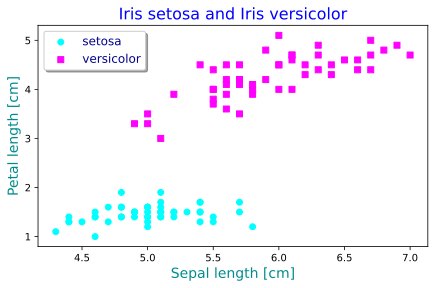

In [3]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(s, header=None, encoding='utf-8')
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)   # if y='Iris-setosa' then y=0, else y=1
X = df.iloc[0:100, [0, 2]].values

plt.figure(figsize=(7, 4))
plt.title("Iris setosa and Iris versicolor", fontsize=16, color='blue')
plt.scatter(X[:50, 0], X[:50, 1], marker='o', color=cmap(0), label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], marker='s', color=cmap(0.999), label='versicolor')
plt.xlabel('Sepal length [cm]', fontsize=14, color='darkcyan')
plt.ylabel('Petal length [cm]', fontsize=14, color='darkcyan')
plt.legend(loc='upper left', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
plt.show()

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Let's use our code for the perceptron. Note that, contrary to the book, I initialized the weight vector with $0$; as a result the number of errors I get by passes over the whole dataset is not exactly the same as the numbers of errors obtained in the book : I get $2$ errors in the first $2$ passes, while the book got $1$ for the first pass and $3$ for the second.

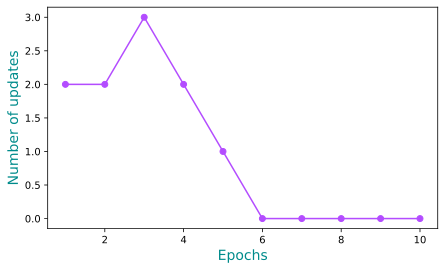

In [4]:
ppn = Perceptron(eta=.1, n_iter=10)
ppn.fit(X, y)

plt.figure(figsize=(7, 4))
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o', color=cmap(0.7))
plt.xlabel('Epochs', fontsize=14, color='darkcyan')
plt.ylabel('Number of updates', fontsize=14, color='darkcyan')
plt.show()

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Now we can use our trained perceptron to predict the classes of all potential observations; we define a dense grid around our training examples and predict the classes of all the intersections; we give them the color cyan if our perceptron predicts that they belong to the class $0$ (ie Iris Setosa) and magenta if they are predicted to be of class $1$ (ie Iris Virginica), both with transparency $0.8$.

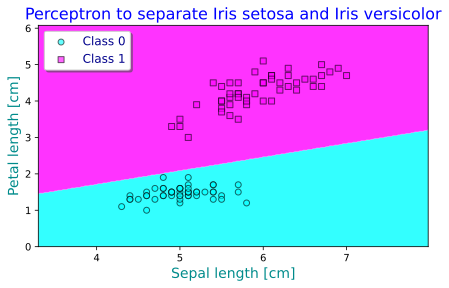

In [5]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # 'np.unique' collects the different values in an array and display them only once, in an 
    # ascending order :
    num_classes = len(np.unique(y))
    # all notations below are mine
    markers = ('o', 's', '^', 'v', '>')
    # instead of the colors in the book, which are colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    # I will use the "cool" cmap, because these colors are nicer and we can distinguish them better
    cmap = plt.get_cmap("cool")
    colors = [cmap(i / (num_classes - 1)) for i in range(num_classes)]
    cmap = ListedColormap(colors[:num_classes])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    #* 'np.arange(x1_min, x1_max, resolution)' generates a 1-dimensional array with values ranging
    # from x1_min to x1_max with a step size of resolution. Here this represents the set of
    # coordinates along the first dimension.
    #* 'np.arange(x2_min, x2_max, resolution)' does the same for the second dimension
    #* at last, if x and y are 1d arrays of dim m and n resp. then 'np.meshgrid' returns two 2d arrays
    # of dimensions n*m : the first is composed of n rows of x, and the second is composed of m
    # columns of y
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    #* the 'ravel()' method flattens any 2d array into a 1d array by writing its rows one after the
    # other from top to bottom so 'np.array([xx1.ravel(), xx2.ravel()]).T' is a 2d dimensional array
    # of dim mn*2 whose m first rows are the coordinates of all the points of ordinate x2_min with
    # their abscissae in ascending order, the following m rows are the coordinates of all the points
    # of ordinate x2_min + resolution with their abscissae in ascending order, etc.
    #* so 'lab' is a 1d array of dim mn; its first m elements are the predictions for the m points of
    # ordinate x2_min, the m following elements are the predictions for the m points of ordinate
    # x2_min + resolution, etc.
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # now 'lab' is the n*m array of predictions for the coordinates of the points in the grid; the
    # second row (from the top) of 'lab' corresponds to the predictions for the second row (from the
    # top as well) of the grid because on a computer screen ascending ordinates go from top to bottom
    lab = lab.reshape(xx1.shape)
    # 'plt.contourf(X, Y, Z, cmap=None, alpha=None)' has many other optional parameters. It traces a
    # contour based on a grid whose coordinates are referenced by 'X' and 'Y' (here 'xx1' and 'xx2')
    # such that to each point on the grid is associated a value given by 'Z'; according to its value
    # each point is given a color defined by the colormap 'cmap' earlier defined and a transparency
    # 'alpha'. Note that 'plt.contourf' does colorize the entire grid, not only a contour.
    plt.contourf(xx1, xx2, lab, cmap=cmap, alpha=0.8)
    # sets the x-axis limits of the plot to span from the minimum value of the array xx1 to the
    # maximum value of xx1. 
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # 'np.unique(y)' is defined above; 'enumerate' iterates over the array and returns the pairs
    # index/value
    for idx, cl in enumerate(np.unique(y)):
        #* X[y == cl, 0] is the first column of the sub-array of 'X' composed of the rows
        # corresponding to the class 'cl'
        #* x=X[y == cl, 0], y=X[y == cl, 1] are the 'x' and 'y' coordinates of the points to be
        # plotted
        #* c=colors[idx] : each point should receive the color corresponding to its index 'idx'
        #* marker=markers[idx] : each point should receive the marker style registered at
        # 'markers[idx]'
        #* label=f'Class {cl}' defines a label for all the points corresponding to the current class
        # 'cl'.  It will be used in the legend of the plot.
        #* edgecolor='black' : the color of the markers edges will be black
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], color=colors[idx], alpha=0.6, marker=markers[idx],
                    label=f'Class {cl}', edgecolor='black')

# plot_decision_regions is the function we have just defined
plt.figure(figsize=(7, 4))
plt.title("Perceptron to separate Iris setosa and Iris versicolor", fontsize=16, color='blue')
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]', fontsize=14, color='darkcyan')
plt.ylabel('Petal length [cm]', fontsize=14, color='darkcyan')
plt.legend(loc='upper left', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
plt.show()

<a id="2"></a><br><br><br><div style="font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
    <h4 style="margin: 0 0 .5rem 2rem; font-size: 18px; font-weight: 800"><font color='darkpink'>2. LINEAR AND POLYNOMIAL REGRESSION</font></h4>
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>2a. Linear regression</font><a id="2a"></a></p>$\quad$
        In machine learning a linear regression model is a model where the predicted value <font color='purple'>$y_{pred}$</font> of an example $x$ is given by an affine function $f$ via <font color='purple'>
        $$y_{pred} \;=\; f(x) \;=\; \sum_{j=1}^n \, w_{j} \, x_{j} \,+\, b \;=\; w.x \,+\, b \,\qquad (24)$$</font>
    where <font color='purple'>$w$</font> is called the "<font color='darkpink'>weight vector</font>" and <font color='purple'>$b$</font> is the "<font color='darkpink'>bias</font>". This is very similar to what we did in the case of the perceptron, but here the targets are not classes but values in a continuous space; given an observation $x$, $f(x)$ is not made to help us predict the correct class for $x$, it is our predicted value for $x$.<br>$\quad$
        Still, we will again integrate the bias to the weight vector as its $0$-th component, and add $1$ as the $0$-th component of any observation, so that the value that we predict for any observation $x$ is
        <font color='purple'>$$y_{pred} \;=\; f(x) \;=\; \sum_{j=0}^n \, w_{j} \, x_{j} \;=\; w.x \,\qquad (25)$$<font color='darkblue'>$\quad$
        In a vectorial format we still have a <font color='purple'>training matrix $X$</font> (starting with a column of $1$) and a <font color='purple'>target vector $y$</font>; but now we are looking for a <font color='purple'>weight $w$</font> such that <font color='purple'>$\;\hat{y} \;=\; Xw\;$</font> would be as close as possible to $y$. We would dream of an equality, but, in general, we have many more observations than we have features, so $X$ is not surjective (a linear map cannot generate a space of dimension greater than its starting domain, so a training matrix cannot generate a space of dimension greater than the number of features), and we can only aim to be "as close as possible". So we need a <font color='darkpink'>cost function</font> <font color='purple'>$L$</font> to give a meaning to this closeness ($L$ will also be called the <font color='purple'>loss function</font>, hence the notation) :<br>
        <font color='purple'>$$L: \mathbb{R}^{n+1} \to \mathbb{R_+} \;/\; w \mapsto L(w) \,\qquad (26)$$</font><br>$\quad$
        We will only use sufficiently regular functions $L$, so that we can apply the Taylor's formula. Given the weight vector $w(t)$ at step $t$ we will update it via <br>
        <font color='darkpink'>$$w(t+1) \;=\; w(t) + \xi_{t} \,\qquad (27)$$</font><br>$\quad$
        The Taylor's formula then gives us
        <font color='purple'>$$L(w(t+1)) \;=\; L(w(t)) \,+\, \nabla L(w(t))\,.\xi_{t} \,+\, O\left( \lVert \xi_{t} \rVert^2 \right) \,\qquad (28)$$</font>
        where <font color='purple'>$$\nabla L = \left( \frac{\partial L}{\partial w_0}, \frac{\partial L}{\partial w_1}, ..., \frac{\partial L}{\partial w_n} \right) \,\qquad (29)$$</font><br>$\quad$
        So we can be sure to improve our cost by using a $\xi_t$ of the form
        <font color='darkpink'>$$\xi_t \;=\; - \eta_t \,\nabla L(w(t)) \,\qquad (30)$$</font>
        if we choose an $\eta_t$ positive and small enough for the Taylor's formula to be applicable. <font color='purple'>$\eta_t$</font> is called the <font color='darkpink'>learning rate</font>, and
        <font color='purple'>$$t \in \mathbb{N} \mapsto \eta_t \in \mathbb{R}_+ \,\qquad (31)$$</font>
        is called the <font color='purple'>learning schedule</font>.<br>$\quad$
            As an example of a cost function, the <font color='darkpink'>Mean Squared Error</font> (or <font color='purple'>$MSE$</font>) is often used :
        <font color='darkpink'>$$MSE(w) \;:=\; \frac{1}{m} \, \lVert Xw - y \rVert^2 \;=\; \frac{1}{m} \, \sum_{i=1}^m \left( x^{(i)}.w - y^{(i)} \right)^2 \,\qquad (32)$$

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>2b. The normal equation</font><a id="2b"></a></p>$\quad$
        When the cost function is the MSE we have<font color='purple'>
        $$\nabla MSE(w) \;=\; \frac{2}{m} \, X^T \, (Xw - y) \,\qquad (33)$$</font>$\quad$
        Moreover<font color='purple'>
        $$\nabla^2 MSE(w) \;=\; \frac{2}{m} \, X^T \, X \,\qquad (34)$$</font>
    is positive, so the $MSE$ gets its minimum for a weight vector $w$ such that $\;\nabla MSE(w) \,=\, 0$. Moreover in general we have enough training examples for $X$ to be injective, so $X^TX$ is invertible and we obtain an explicit value for our weight vector :<br>
    <font color='darkpink'>$$w \;=\; \left( X^T X \right)^{-1} \, \left(X^T y \right) \,\qquad (35)$$<font color='darkblue'>$\quad$
    Equation $(35)$ is called the <font color='purple'>normal equation</font>. When $\left( X^T X \right)$ is not too big (typically $\, n\leq10^4$) we can use it to compute the weight vector which minimizes the cost. Otherwise we will use one of the gradient descent methods presented below.

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>2c. The batch gradient descent (BGD)</font><a id="2c"></a></p>$\quad$
        In the batch gradient descent we use a constant learning rate $\eta$, so the updating equation is <font color='darkpink'>
        $$w(t+1) \;=\; w(t) - \eta \, \nabla L(w(t)) \,\qquad (36)$$</font><br>$\quad$
        When the cost function is the $MSE$ we have<font color='purple'>
        $$w(t+1) \;=\; w(t) - \frac{2\eta}{m} \, X^T \, (Xw(t) - y) \,\qquad (37)$$

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>2d. The stochastic gradient descent (SGD)</font><a id="2d"></a></p>$\quad$
        Equations $(36)$ and even $(37)$ may still be computationnally too demanding. Or the data may arrive one observation at a time (in a real time application). Then the method of choice is the stochastic gradient descent (SGD). SGD needs a cost which is the mean of the costs of each row :<font color='darkpink'>
        $$L \;=\; \frac{1}{m} \, \sum_{j=1}^m L^{(i)} \,\qquad (38)$$</font>$\quad$
        For example in the case of the $MSE$ the cost for the $i$-th instance is<font color='purple'>
        $$L^{(i)} \;=\; \left(w.x^{(i)} - y^{(i)} \right)^2 \,\qquad (39)$$</font><br>$\quad$
        At each step $t$, instead of using the whole data matrix $X$ and trying to minimize the whole cost function $L$, SGD uses a randomly chosen row $\zeta_t$ and tries to minimize its cost $L^{(\zeta_t)}$. The updating equation is<font color='darkpink'>
        $$w(t+1) \;=\; w(t) - \eta_t \,\nabla L^{(\zeta_t)}(w(t)) \,\qquad (40)$$</font>$\quad$
        In the case of the $MSE$ this equation becomes<font color='darkpink'>
        $$w(t+1) \;=\; w(t) \,-\, 2\eta_t \, \left( w(t).x^{(\zeta_t)} - y^{(\zeta_t)} \right) \, (x^{(\zeta_t)})^T \,\qquad (41)$$</font><br/>
    <p style="margin: 0 0 0 2rem; font-size: 15px; font-weight: 600"><font color='purple'>$\quad$Note :</font></p> $\quad$
        Usually the same learning rate is used during $m$ iterations, then decreased, then we keep the same value during the next $m$ iterations, etc. A round of $m$ iterations with a fixed learning rate is called an <font color='darkpink'>epoch

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>2e. The mini-batch gradient descent</font><a id="2e"></a></p>$\quad$
        Mini-batch gradient descent is a compromise between the full batch gradient descent with a fixed learning rate and the SGD where only one row is used at a time with a decreasing learning rate. Mini-batch gradient descent consists in using a full batch gradient descent updating method over a small number of randomly chosen instances with a decreasing learning rate; the instances are randomly chosen at each iteration and their contributions are added. More precisely, at each epoch we randomly shuffle the entire dataset and then divide it into mini-batches; each mini-batch is then processed sequentially, and the process repeats in the next epoch with a newly shuffled dataset.

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>2f. Polynomial regression</font><a id="2f"></a></p>$\quad$
        Up to now we have looked for a weight vector $w$ such that<font color='darkpink'>
        $$\hat{y} \;=\; Xw \;=\; \sum_{j=0}^n w_j \, X_j \,\qquad (42)$$</font>
    be as close as possible to the target vector $y$, where $X_j$ is the $j$-th column feature of $X$.<br>$\quad$
    Let's write $\hat{y}$ as a sum of its dependencies with respect to each feature :
    <font color='purple'>$$\hat{y} \;=\; \sum_{j=0}^n \hat{y}_j \;\;\;\;\text{where}\;\; \hat{y}_j \;=\; w_j \, X_j \,\qquad (43)$$<font color='darkblue'>
    Now, suppose that, for a given $j$, we suspect that the dependence of $\hat{y}_j$ in $X_j$ is not linear but polynomial, ie<font color='purple'>
        $$\exists \, \alpha_0, \alpha_1, ..., \alpha_d \in \mathbb{R},\;\;\; \hat{y}_j \,=\, \sum_{k=0}^d \alpha_k \, (X_j)^k \,\qquad (44)$$</font>
    where<font color='purple'>
        $$(X_j)^k \;=\; \left( (x^{(i)}_j)^k \right)^{m}_{i=1} \,\qquad (45)$$</font>$\quad$
        Then it is possible to obtain the coefficients $\alpha_k$ via a linear regression. The trick is to add some columns to the training matrix : right before the $X_j$ column we add a column of $1$, and right after the $X_j$ column we add the columns $(X_j)^2$, then $(X_j)^3$, ..., $(X_j)^d$. Now a linear regression will get the coefficients of the linear dependence of the target vector in $(X_j)^k$ for all $k$.<br>$\quad$
        More generally, in the same way, we can add to the original training matrix any product of several different features (for example we could add a column for a dependence in $\: (X_1)^3 . (X_2)^5 . X_4 \,$, another for a dependence in $\: (X_2).(X_3)^7 \,$,...).<br>$\quad$
        Hence, <font color='darkpink'>linear regression methods can capture any polynomial dependence of the target vector on the original features.</font> We just need to add the monomials we want to capture the dependence on.

<a id="3"></a><br><br><br><div style="font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
    <h4 style="margin: 0 0 .5rem 2rem; font-size: 18px; font-weight: 800"><font color='darkpink'>3. ADALINE</font></h4>
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>3a. The Adaline strategy</font><a id="3a"></a></p>$\quad$
        Alike the perceptron, Adaline is a binary classifier : its goal is to correctly classify observations between two classes, class $0$ and class $1$. But its strategy is not the same. Adaline considers that the target space is continuous; it determines the best weights (and the best bias) using a linear regression with the MSE as its cost function (see [2a.](#2a)); once the weights have been obtained, an observation will be predicted to be of class $1$ iff its predicted value is $\geq0.5$.<br>
    This strategy will be generalized by introducing an activation function, which is the identity function in the case of Adaline.

<figure style="text-align: center;">
    <img src="2.2.The Adaline strategy.png" alt="Comparison between the perceptron and the Adaline strategies for their algorithms. The main difference is that Adaline has a threshold function at the end to determine the class of an instance" width="500" />
    <figcaption style="margin-top: .5rem; font-weight: bold; color: purple">The Adaline strategy</figcaption>
</figure>

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>3b. Adaline with the batch gradient descent</font><a id="3b"></a></p>$\quad$
        The following code is given in the book. It codes Adaline with a Batch Gradient Descent. I removed the line faking the use of an activation function (which is the identity in Adaline), and added two lines to print the bias and the weight vector in order to compare the results obtained with the BGD to the results obtained with the normal equation.

In [6]:
class AdalineGD:
    """ADAptive LInear NEuron classifier.
    
    Parameters
    ------------
    eta : the learning rate (a float between 0.0 and 1.0)
    n_iter : the number of passes over the training dataset (an int)
    random_state : a random number generator seed for random weight initialization (an int)
    
    Attributes
    -----------
    w_ : the weight vector (a 1d-array of floats)
    b_ : the bias (a float)
    losses_ : the MSE value at each epoch (a 1d array of floats)
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """ Fit training data :
        Parameters
        ----------
        X : the training matrix, of shape n_examples*n_features
        y : the target vector, of length n_examples
        Returns
        -------
        self : object """

        # 'rgen = np.random.RandomState(self.random_state)' was the original line of code; I use the
        # modern way (according to chatGPT) instead
        # 'rgen' will be a random number generator object, defined via NumPy's 'default_rng' function
        # which requires a seed value to initialize the RNG ('self.random_state'), determining the
        # sequence of random numbers generated by the RNG
        rgen = np.random.default_rng(self.random_state)
        # generates an array of random numbers drawn from a normal distribution with a mean ('loc') of
        # 0 and a standard deviation ('scale') of 0.01. The number of random numbers to generate is
        # 'X.shape[1]', ie the number of features in X; thus, each random number generated represents
        # an initial weight value for a feature in a machine learning model
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        # initializes the bias term 'self.b_' of the linear regression model to 0
        self.b_ = np.float_(0.)
        # initializes an empty list ('self.losses_') to store the square of the errors between the
        # actual target values (y) and the predicted net input ('output') of the model
        self.losses_ = []
        # 'self.n_iter' is the number of epochs
        for i in range(self.n_iter):
            # 'self.net_input(X)' is the estimated "net inputs" for the set of instances
            net_input = self.net_input(X)
            # I have removed the activation function since it was equal to the identity function
            output = net_input
            errors = (y - output)
            # updates the weights in the case of the MSE, using gradient descent (for a general
            # explanation see "2. Linear and polynomial regression", and for this particular equation
            # see "2c. The batch gradient descent (BGD)"
            self.w_ += self.eta * 2.0 * X.T @ errors / X.shape[0]
            # update the bias using the same equation
            self.b_ += self.eta * 2.0 * errors.mean()
            # computes the MSE
            loss = (errors**2).mean()
            # appends it to 'self.losses_', so it keeps track of the evolution of the MSE
            self.losses_.append(loss)
        # I added these two lines in order to compare the results obtained from the batch gradient
        # descent with those obtained from the normal equation
        print(BB + "b_ =" + MB, self.b_)
        print(BB + "w_ =" + MB, self.w_)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return X @ self.w_ + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        # returns the estimated class of the instances
        return np.where(self.net_input(X) >= 0.5, 1, 0)

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>3c. Convergence problems</font><a id="3c"></a></p>$\quad$
        The plot below shows two types of problems that we can encounter when using a Gradient Descent method to obtain the correct weight vector (and bias).<br>
        The first subplot corresponds to a learning rate that is too big : in this case we can not use the Taylor's formula $(28)$ to improve the cost; here the cost skyrockets.<br>
        The second subplot corresponds to a learning rate that is too small : in this case the update $(30)$ is too small and the convergence can be much too slow.<br>$\quad$
        <p style="margin: 0 0 0 2rem; font-size: 15px; font-weight: 600"><font color='purple'>$\quad$Note :</font></p> $\quad$
            In the next cell, I print the true values for the weights, obtained from the normal equation ($(35)$). The true values for the weights are easily derived from the normal equation since X has only $3$ columns (counting the first composed of $1$), so $\;\left( X^T X \right)^{-1}\;$ can easily be computed.

b_ = -4.712688620532706e+40
w_ = [-2.63199343e+41 -1.47290555e+41]
b_ = 0.0036654306964955786
w_ = [0.02564552 0.02523008]


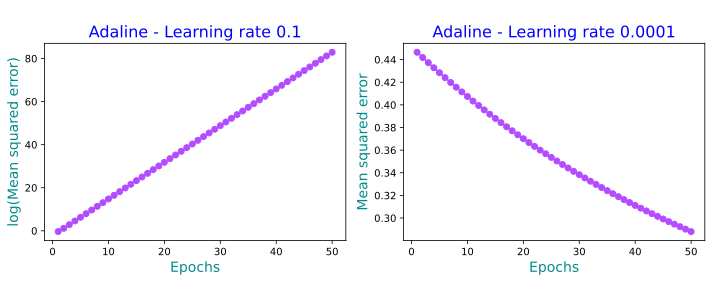

In [7]:
# creates a Matplotlib figure with two subplots arranged in a single row of 2 columns, for a total
# size of 10 units in width by 4 units in height; 'fig' is the entire figure and 'ax' is the array
# of the subplots. So, after this line, we can use 'fig 'to modify the properties of the entire
# figure and use ax[0] and ax[1] to modify the properties of the individual subplots.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# runs Adaline with the training matrix and target vector defined in cell $2$, with one set of
# hyperparameters
ada1 = AdalineGD(n_iter=50, eta=0.1).fit(X, y)
ax[0].set_title("\nAdaline - Learning rate 0.1", fontsize=16, color='blue')
# plots in 'ax[0]' the points with abscissae in 'range(1, len(ada1.losses_) + 1)', which generates a
# sequence of integers from 1 to the length of ada1.losses_ (inclusive), and ordinates in
# 'np.log10(ada1.losses_)', which calculates the base-10 logarithm of each element in ada1.losses_,
# and marks them as circles
ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o', color=cmap(0.7))
ax[0].set_xlabel("Epochs", fontsize=14, color='darkcyan')
ax[0].set_ylabel("log(Mean squared error)", fontsize=14, color='darkcyan')

# runs Adaline with the same training matrix and target vector, but with another learning rate
ada2 = AdalineGD(n_iter=50, eta=0.0001).fit(X, y)
ax[1].set_title("\nAdaline - Learning rate 0.0001", fontsize=16, color='blue')
ax[1].plot(range(1, len(ada2.losses_) + 1), ada2.losses_, marker='o', color=cmap(0.7))
ax[1].set_xlabel("Epochs", fontsize=14, color='darkcyan')
ax[1].set_ylabel("Mean squared error", fontsize=14, color='darkcyan')
plt.tight_layout()
plt.show()

In [8]:
# this snippet prints the weight vector obtained from the normal equation...
# in the codes, 'X' is the training matrix without the added first column of $1$ (I kept the codes of
# the book); here 'Z' is "my" matrix 'X' (the one with the first columns of $1$)
Z = np.insert(X, 0, 1, axis=1)
# '@' is used in Python for the products of matrices and 'Z.T' is the transpose of Z; the normal
# equation gives w as w = inv(Z.T @ Z) @ (Z.T @ y) where 'inv' here means the inverse matrix; but it
# is simpler and more stable to compute it as the solution of the linear system (Z.T @ Z) w = Z.T @ y
w = np.linalg.solve(Z.T @ Z, Z.T @ y)
print(BB + "Weight vector (obtained via the normal equation) :" + MB, w)

Weight vector (obtained via the normal equation) : [ 0.14750539 -0.13747428  0.3859596 ]


<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>3d. Standardization</font><a id="3d"></a></p>$\quad$
        Standardization is an affine procedure consisting in replacing each feature $\; X_j,\, j \in \{1, \ldots, n\}\;$ (so without modifying the first column of $1$) of the training matrix by its counterpart of mean $0$ and standard deviation $1$ : if $\mu_j$ is the mean of $X_j$ and if $\sigma_j$ is its standard deviation then we replace each $X_j$ with<font color='purple'>
        $$\forall j \in \{1, \ldots, n\} \qquad X_j \;:=\; \frac{X_j - \mu_j}{\sigma_j} \,\qquad (46)$$</font>$\quad$
        "One of the reasons why standardization helps with gradient descent learning is that it is easier to find a learning rate that works well for all weights (and the bias). If the features are on vastly different scales, a learning rate that works well for updating one weight might be too large or too small to update the other weight equally well. Overall, using standardized features can stabilize the training such that the optimizer has to go through fewer steps to find a good or optimal solution."<br>$\quad$
    Let's try it in the following cell!... In the next, I print the true values of the weight vector, obtained from the normal equation. We can see that, this time, the BGD has worked very well.

b_ = 0.5000000000000001
w_ = [-0.08777202  0.55626809]


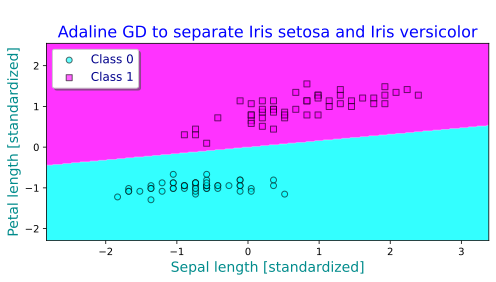

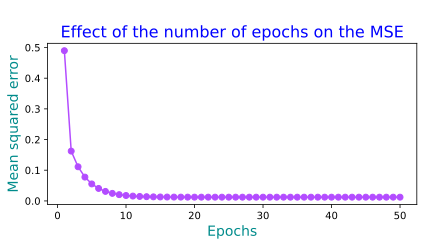

In [9]:
#  ensures that a new, independent copy of the matrix array is created
X_std = np.copy(X)
# standardization
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
ada_gd = AdalineGD(n_iter=50, eta=0.5)
ada_gd.fit(X_std, y)

plt.figure(figsize=(7, 4))
plt.title("\nAdaline GD to separate Iris setosa and Iris versicolor", fontsize=16, color='blue')
# 'plot_decision_regions' has been defined cell 4
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.xlabel("Sepal length [standardized]", fontsize=14, color='darkcyan')
plt.ylabel("Petal length [standardized]", fontsize=14, color='darkcyan')
plt.legend(loc='upper left', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
# adjusts the size and positions of the subplots or axes to minimize overlap and provide a more
# visually appealing layout
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 3.5))
plt.title("\nEffect of the number of epochs on the MSE", fontsize=16, color='blue')
plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o', color=cmap(0.7))
plt.xlabel('Epochs', fontsize=14, color='darkcyan')
plt.ylabel('Mean squared error', fontsize=14, color='darkcyan')
plt.tight_layout()
plt.show()

In [10]:
# as in cell 7, 'Z' is "my" matrix X, and w is the associated weight vector; so this prints the
# weight vector obtained from the normal equation :
Z = np.insert(X_std, 0, 1, axis=1)
w = np.linalg.solve(Z.T @ Z, Z.T @ y)
print(BB + "Weight vector (obtained via the normal equation) :" + MB, w)

Weight vector (obtained via the normal equation) : [ 0.5        -0.08777482  0.55628495]


<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>3e. Adaline with the stochastic gradient descent</font><a id="3e"></a></p>$\quad$
        The following code is given in the book. It codes Adaline with a Stochastic Gradient Descent. I removed the line faking the use of an activation function (which is the identity in Adaline), and added two lines to print the bias and the weight vector in order to compare the results obtained with the SGD to the results obtained with the normal equation.<br>

In [11]:
class AdalineSGD:
    """ADAptive LInear NEuron classifier.
    
    Parameters
    ------------
    eta : the learning rate (a float between 0.0 and 1.0)
    n_iter : the number of passes over the training dataset (an int)
    random_state : a random number generator seed for random weight initialization (an int)
    shuffle : a boolean (default: True) for shuffling the training data at every epoch to prevent
            cycles (if True).
    
    Attributes
    -----------
    w_ : the weight vector (a 1d-array of floats)
    b_ : the bias (a float)
    losses_ : the MSE value of the chosen examples at each epoch (a 1d array of floats)
    """
    
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.shuffle = shuffle
        self.random_state = random_state
        self.w_initialized = False

    def fit(self, X, y):
        """ Fit training data :
        Parameters
        ----------
        X : the training matrix, of shape n_examples*n_features
        y : the target vector, of length n_examples
        Returns
        -------
        self : object """
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            losses = []
            for xi, target in zip(X, y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        # I added these two lines in order to compare the results obtained from the stochastic
        # gradient descent with those obtained from the normal equation
        print(BB + "b_ =" + MB, self.b_)
        print(BB + "w_ =" + MB, self.w_)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        # originally :
        # if y.ravel().shape[0] > 1:
            # for xi, target in zip(X, y):
                # self._update_weights(xi, target)
        # else:
            # self._update_weights(X, y)
        # I believe this can be written much more simply :
        for xi, target in zip(X, y):
            self._update_weights(xi, target)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.default_rng(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float_(0.)
        self.w_initialized = True

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.net_input(xi)
        error = (target - output)
        self.w_ += self.eta * 2.0 * xi * (error)
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        return loss

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.5, 1, 0)

<br><div style="font-family: Arial; font-size: 16; color: darkblue; font-weight: 600">
    <p style="margin: 0; font-size: 12; font-weight: 500">$\quad$
        Here standardization is used, so the results should be compared with the previous subchapter (see [3d.](#3d)). The best learning rate I have found is much smaller ($0.004$ instead of $0.5$) and it is difficult to get the same result as with the full BGD, even with many more epochs : I have used $500$ epochs instead of $50$ but the results are still not as good as with the BGD. But they need less computations per epoch, and can be handled online (one instance at a time) :<br>
    "If we want to update our model, for example in an online learning scenario with streaming data, we could simply call the partial_fit method on individual training examples, for instance :$\;$ ada_sgd.partial_fit(X_std[0, :], y[0])."

b_ = 0.5011202349978503
w_ = [-0.08748227  0.55673693]


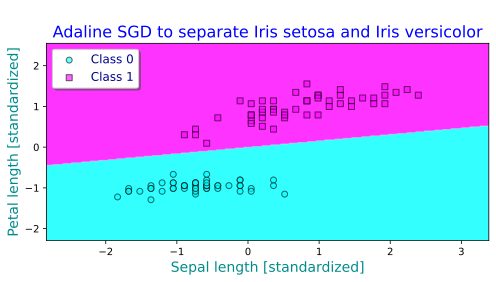

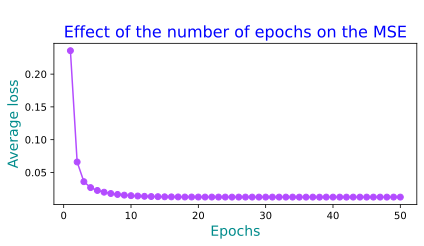

In [12]:
ada_sgd = AdalineSGD(n_iter=500, eta=0.004, random_state=1)
# the standardized matrix, defined in cell 8, is used :
ada_sgd.fit(X_std, y)

plt.figure(figsize=(7,4))
# 'plot_decision_regions' has been defined cell 4
plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title("\nAdaline SGD to separate Iris setosa and Iris versicolor", fontsize=16, color='blue')
plt.xlabel('Sepal length [standardized]', fontsize=14, color='darkcyan')
plt.ylabel('Petal length [standardized]', fontsize=14, color='darkcyan')
plt.legend(loc='upper left', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
# adjusts the size and positions of the subplots or axes to minimize overlap and provide a more
# visually appealing layout
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,3.5))
plt.title("\nEffect of the number of epochs on the MSE", fontsize=16, color='blue')
plt.plot(range(1, 51), ada_sgd.losses_[:50], marker='o', color=cmap(0.7))
plt.xlabel('Epochs', fontsize=14, color='darkcyan')
plt.ylabel('Average loss', fontsize=14, color='darkcyan')
plt.tight_layout()
plt.show()

In [13]:
# as in cell 7, 'Z' is "my" matrix X, and w is the associated weight vector; so this prints the
# weight vector obtained from the normal equation :
Z = np.insert(X_std, 0, 1, axis=1)
w = np.linalg.solve(Z.T @ Z, Z.T @ y)
print(BB + "Weight vector (obtained via the normal equation) :" + MB, w)

Weight vector (obtained via the normal equation) : [ 0.5        -0.08777482  0.55628495]
